심장 질환에 대한 여러 특성의 환자 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")
# 심장 질환에 대한 여러 특성의 환자 303명 csv 파일 읽어옴.
df = pd.read_csv('heart.tsv', sep="\t")
print(df.head())
print("The shape of the data set is :", df.shape)

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
The shape of the data set is : (303, 14)


In [3]:
unique_counts = df.nunique()
print(unique_counts)
cat_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
con_cols = ['age','trtbps','chol','thalachh','oldpeak']
target_col = ['output']

print("카테고리 열",cat_cols)
print("연속적 열",con_cols)
print("타겟 열",target_col)


age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64
카테고리 열 ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
연속적 열 ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
타겟 열 ['output']


In [4]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
# 결측치 확인
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

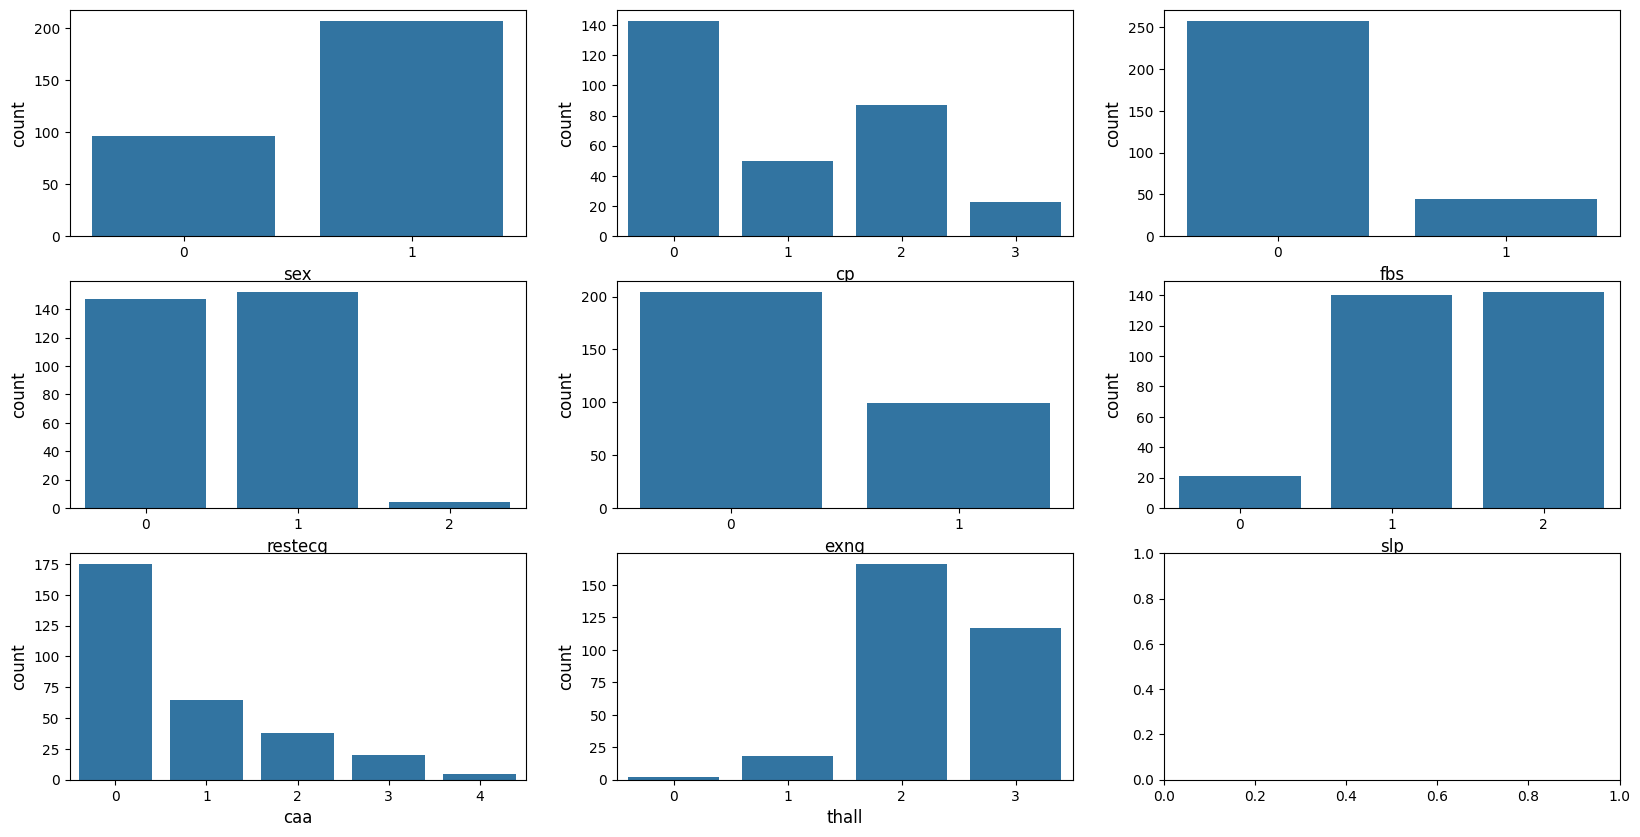

In [6]:
# 카테고리형 데이터의 개수 세려서 plot으로 출력
fig, axs = plt.subplots(ncols=3, nrows=3,figsize=(20,10))
for i, feature in enumerate(cat_cols, 1):
    plt.subplot(3,3,i)
    sns.countplot(x=feature, data=df)
    plt.ylabel('count', fontsize=12)
    plt.xlabel(feature, fontsize=12)


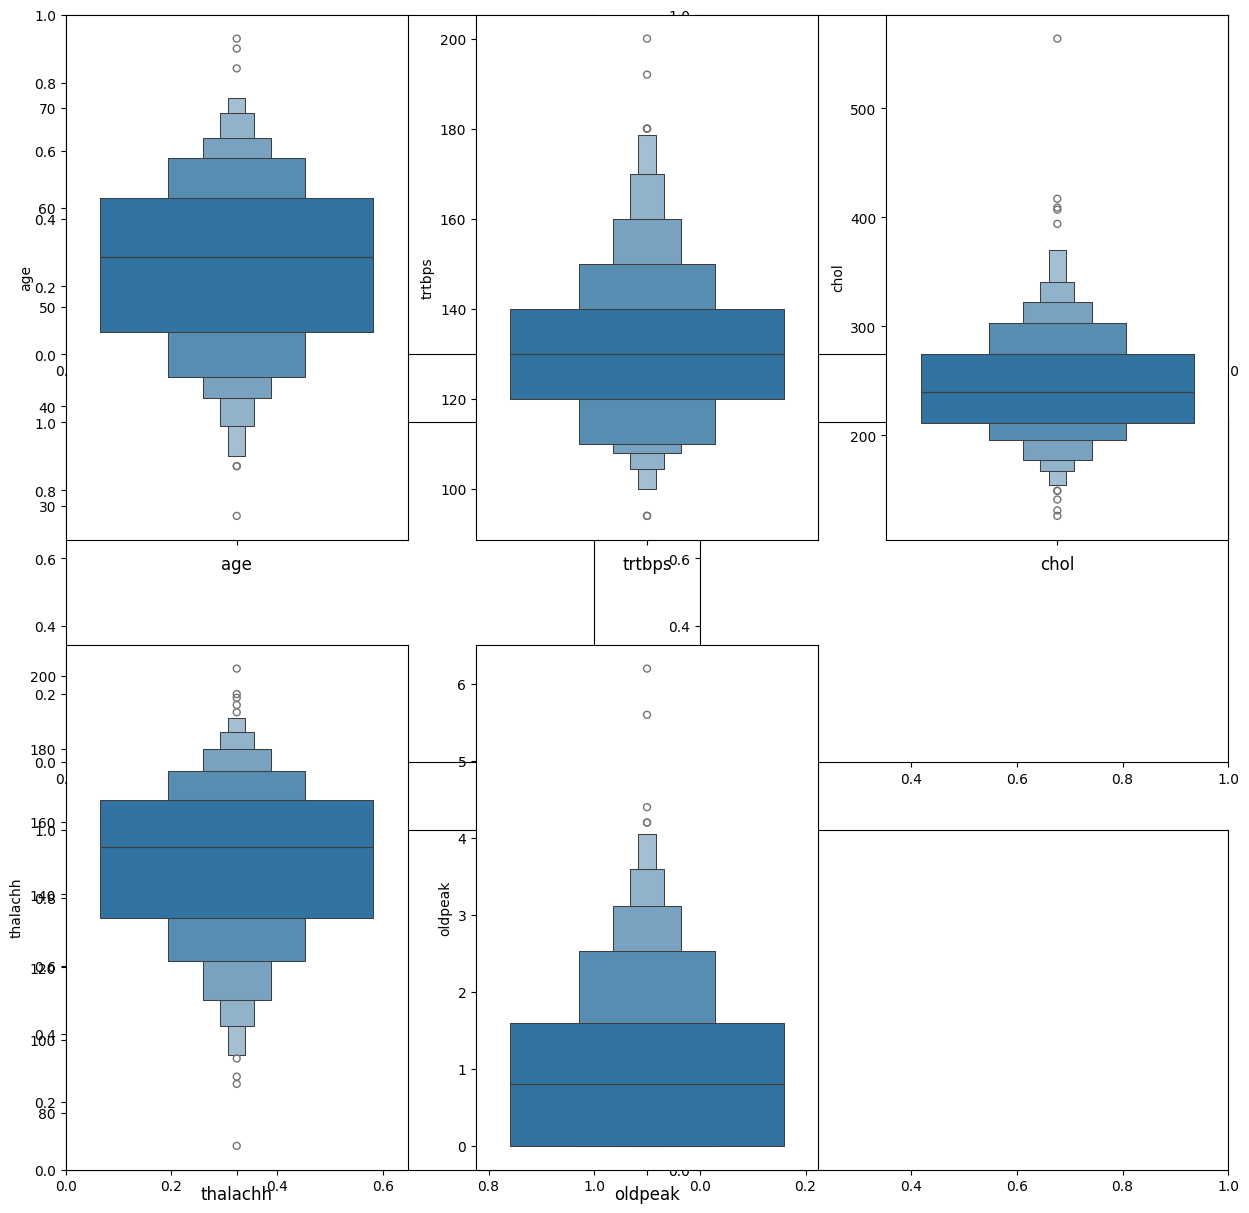

In [7]:
# 연속형 데이터 box plot 으로 시각화.
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
for i, feature in enumerate(con_cols, 1):
    plt.subplot(2,3,i)
    sns.boxenplot(y=feature, data=df)
    plt.xlabel(feature, fontsize=12)


<Axes: xlabel='output', ylabel='count'>

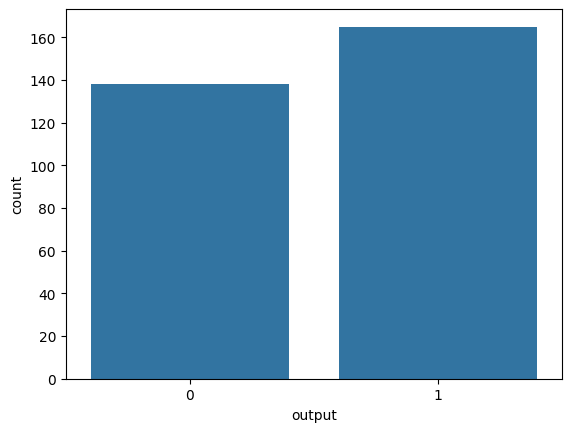

In [8]:
# output data 시각화
sns.countplot(x='output', data=df)

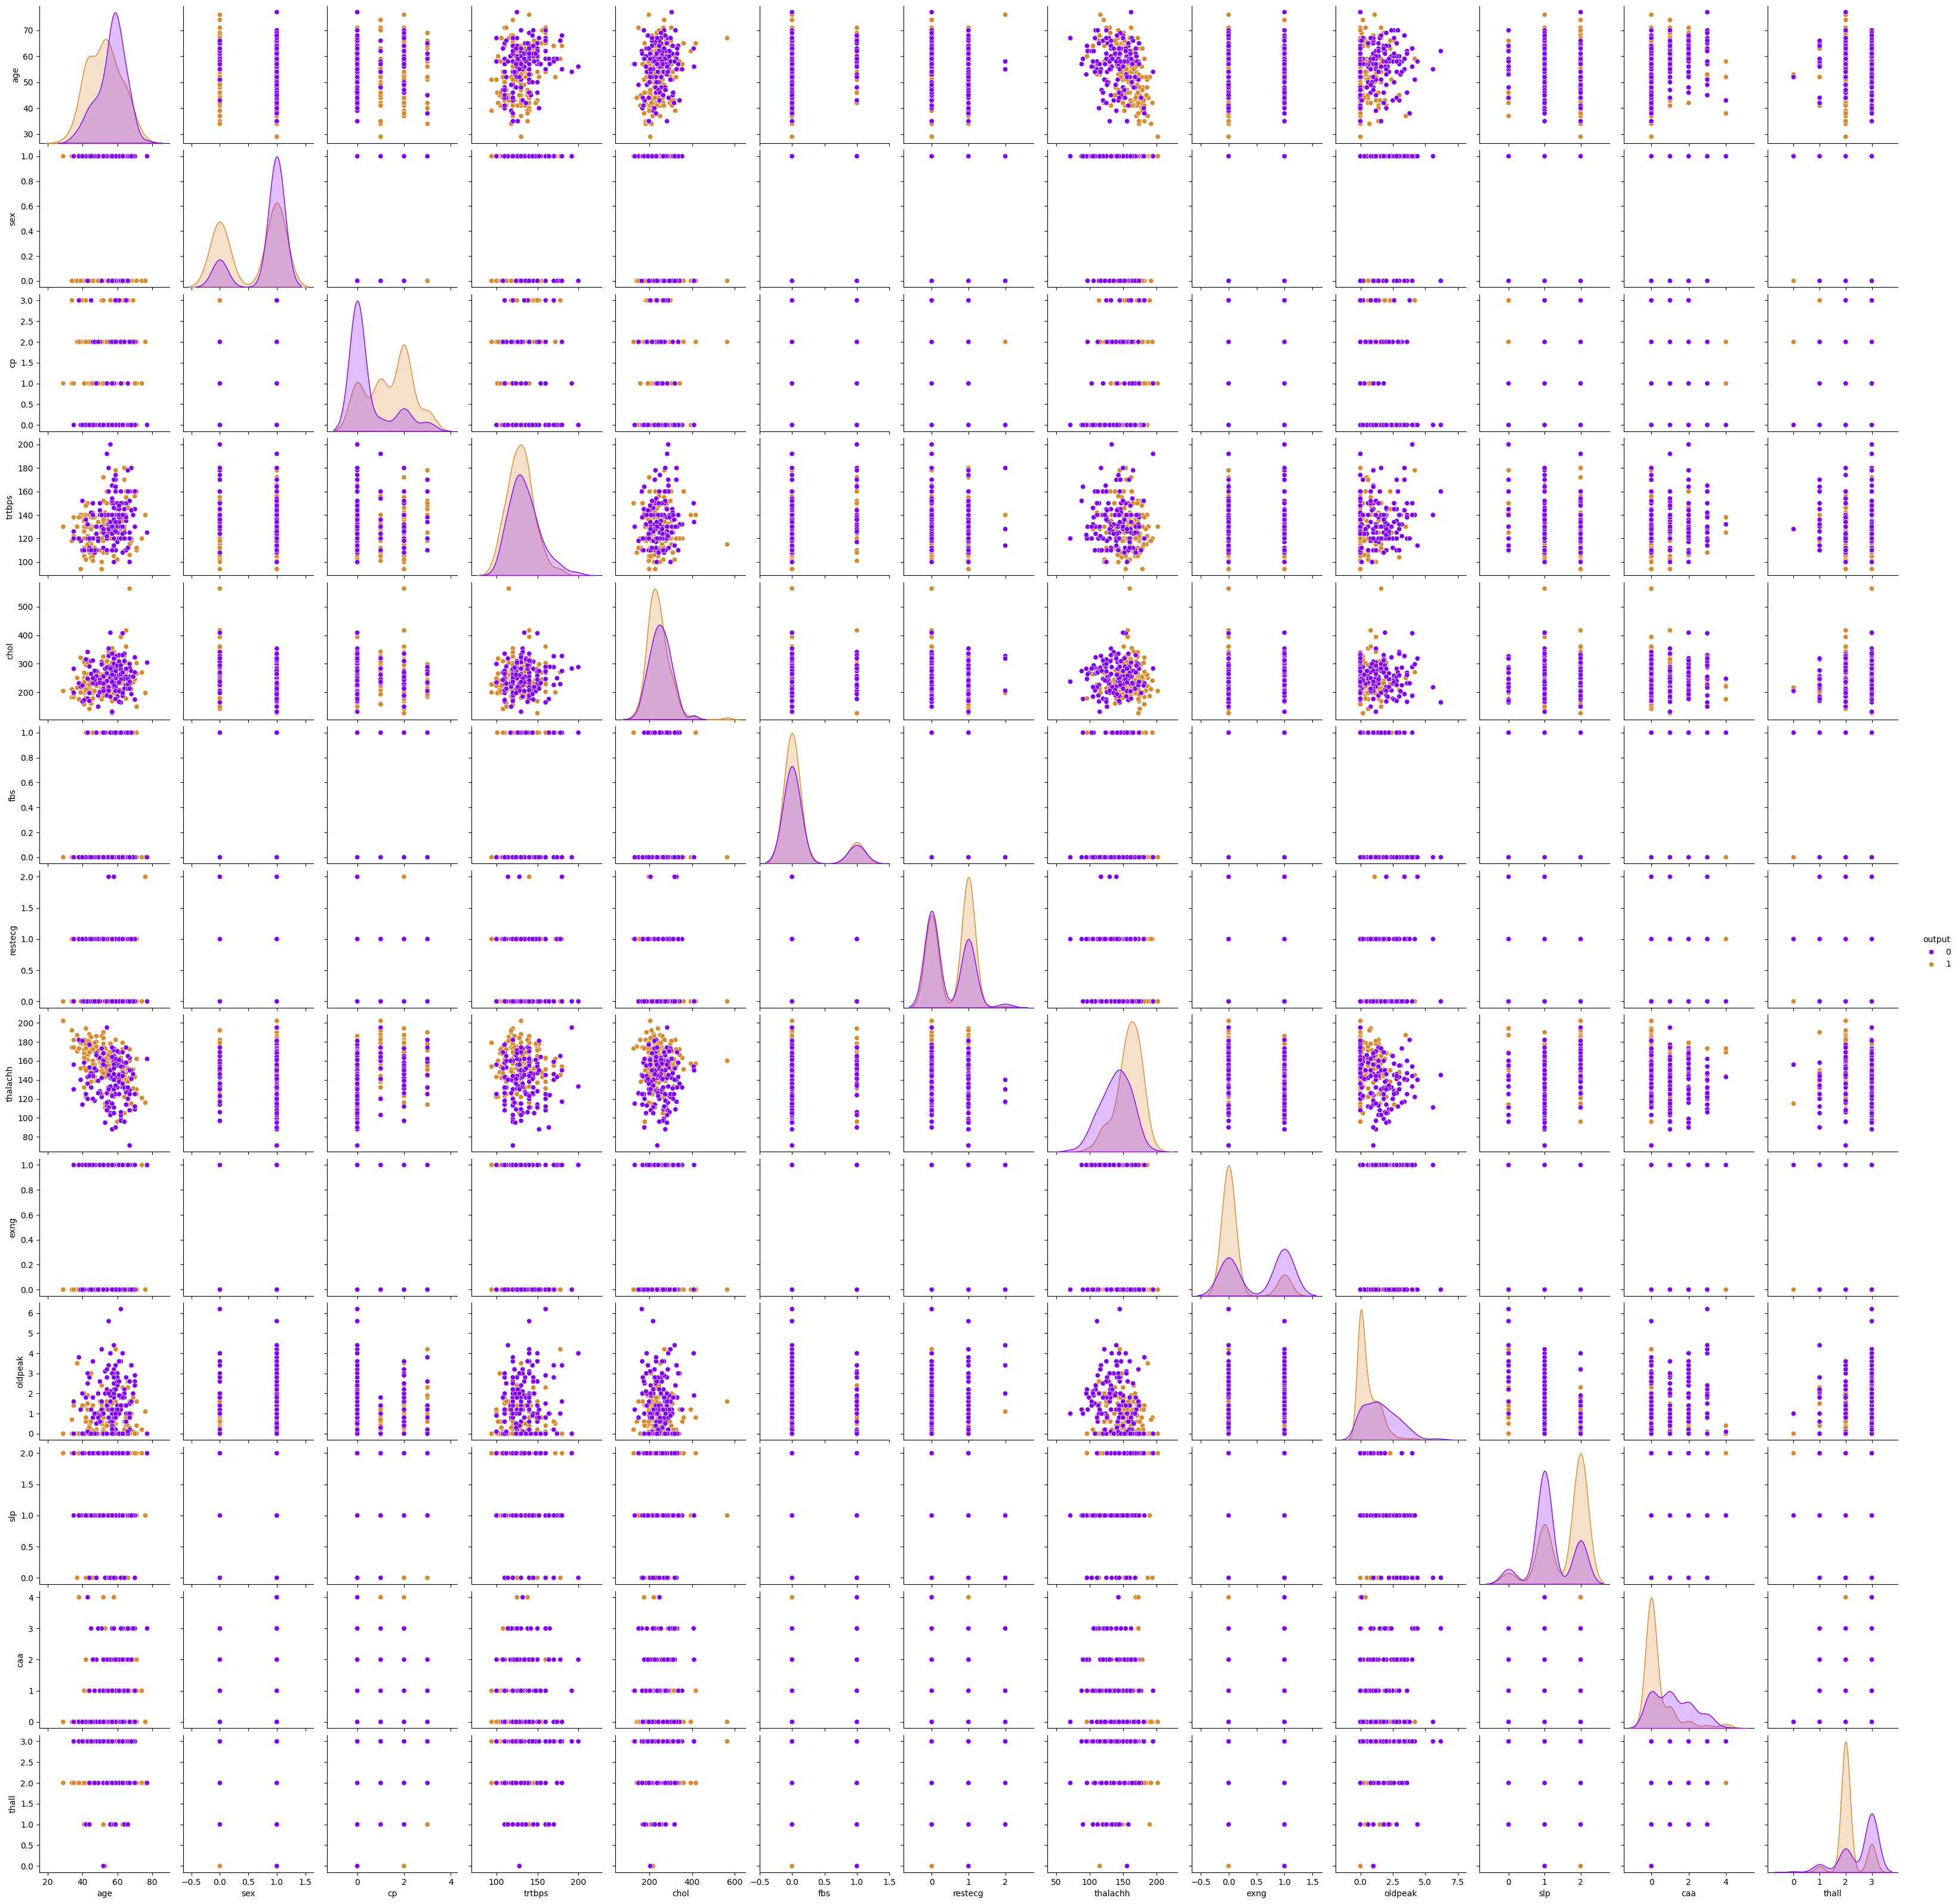

In [9]:
sns.pairplot(df, hue='output', palette = ["#8000ff", "#da8829"])
plt.show()

Logistic Regression model fitting

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix

df1 = df
cat_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
con_cols = ['age','trtbps','chol','thalachh','oldpeak']

df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

X = df1.drop(['output'], axis =1)
y = df1[['output']]

X

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
299,45,110,264,132,1.2,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
300,68,144,193,141,3.4,True,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
301,57,130,131,115,1.2,True,False,False,False,False,...,True,True,False,True,False,False,False,False,False,True


In [17]:
# X_train, y_train: 학습용으로 사용될 독립변수와 종속변수 (전체 데이터의 80%)
# X_test, y_test: 테스트용으로 사용될 독립변수와 종속변수 (전체 데이터의 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습. 성능 평가.
# 규제X. 최대 반복 횟수는 10번.
logreg = LogisticRegression(penalty=None, C=0.0001, max_iter=100)
# X_train, y_train을 사용해 로지스틱 회귀 모델 학습시킴.
logreg.fit(X_train, y_train)
# X_test 에 대한 예측 확률값 구하기
y_pred_proba = logreg.predict_proba(X_test)
# 예측 확률 중 가장 높은 클래스를 선택해서 y_pred로 둠
y_pred = np.argmax(y_pred_proba, axis=1)
# train data 로 학습한 logistic regression의 train data에서의 정확도.
train_acc = accuracy_score(y_train, logreg.predict(X_train))
print("logistic regression 학습 data set 정확도:", train_acc)
# train data 로 학습한 logistic regression의 test data에서의 정확도.
print("logistic regression 테스트 data set 정확도:", accuracy_score(y_test, logreg.predict(X_test)))



logistic regression 학습 data set 정확도: 0.871900826446281
logistic regression 테스트 data set 정확도: 0.8852459016393442


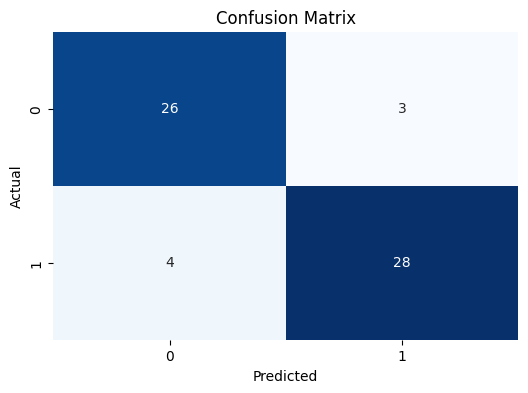

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
from sklearn.metrics import log_loss

# X_train에 대한 예측 확률 값 구하기
y_pred_proba_train = logreg.predict_proba(X_train)
# 실제 레이블 y_train과 예측 확률 값 y_pred_proba_train 사이의 로그 손실을 계산
loss = log_loss(y_train, y_pred_proba_train)
print(loss)

0.2943570708716732
